In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as si1
import scipy.io as si
import scipy.optimize as op

In [2]:
data1 = si.loadmat("ex3data1.mat")

In [3]:
X = data1['X']
y = data1['y']
m = X.shape[0]
X = np.insert(X, 0 ,1, axis=1)
ranInd = np.random.permutation(m)
newX = X[ranInd[0:100], 1:]

In [4]:
def displayImgs(nX):
    displayWidth = 20
    displayHeight = 20
    displayRow = 10
    displayCol = 10
    pad = 1
    displayArray = np.zeros((displayRow *(displayHeight),displayCol * (displayWidth)))
    currEx = 0
    for i in range(displayRow):
        for j in range(displayCol):
            a = int((i)*(displayHeight))
            b = int((j)*(displayWidth))
            c = int(a + displayHeight)
            d = int(b + displayWidth)
            displayArray[a:c,b:d] = np.reshape(nX[currEx, :], (displayHeight, displayWidth)).T
            currEx += 1
            
    
    fig = plt.figure(figsize=(6,6))
    img = si1.misc.toimage( displayArray )
    plt.imshow(img,cmap = 'gray')

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


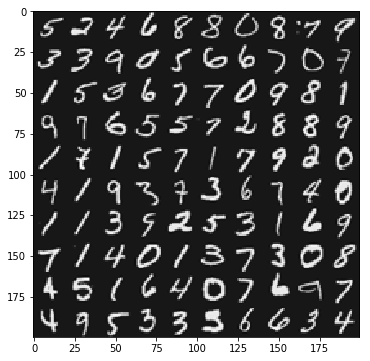

In [5]:
displayImgs(newX)

In [6]:
def sigmoidFn(hV):
    return 1/(1+ np.exp(-hV))
def hValue(theta, nwX):
    return nwX.dot(theta.reshape((theta.shape[0],1)))

def costFunction(theta, nwX, y):
    m = nwX.shape[0]
    theta = theta.reshape((theta.shape[0],1))
    hx = sigmoidFn(hValue(theta,nwX))
    term1 = np.sum(y.reshape((y.shape[0],1))*np.log(hx))
    term2 = np.sum((np.ones((m,1))-y)*np.log(np.ones((m,1))-hx))
    term3 = -(1/m)*(term1+term2)
    return term3
def Gradient(theta, nwX, y):
    m = nwX.shape[0]
    theta = theta.reshape((theta.shape[0],1))
    hx=sigmoidFn(hValue(theta,nwX))
    gradient = np.zeros((nwX.shape[1],1))
    gradient = ((((hx-y).T).dot(nwX))/m)
    return (gradient.T).reshape((gradient.shape[1],))
def rlCf(theta, nwX, y,lambd):
    m=nwX.shape[0]
    term1 = costFunction(theta,nwX,y)
    term2 = term1 + np.sum((lambd/(2*m))*((theta.T).dot(theta)))
    return term2
def rlGr(theta, nwX, y,lambd):
    term1 = Gradient(theta, nwX, y)
    term2 = term1 + (lambd/m)*theta
    return term2


In [7]:
iniT = np.zeros((401,1))
allTheta = np.zeros((10, 401))
def oneVsAll(theta, nwX, y, numLabels, lambd):
    for i in range(numLabels):
        iclass = i if i else 10
        logic_Y = np.array([1 if x == iclass else 0 for x in y]).reshape((5000,1))
        result = op.fmin_cg(costFunction, fprime=Gradient, x0=theta.reshape((theta.shape[0],)), \
                              args=(nwX, logic_Y), maxiter=50, disp=False,\
                              full_output=True)
        allTheta[i,:] = result[0]

In [8]:
oneVsAll(iniT, X, y, 10, 0)

In [9]:
def PredictPerc(theta, X, y):
    correct = 0
    for j in range(X.shape[0]):
        hv = np.ones(10)
        maxv = hValue(allTheta[0,:],X[j,:])
        p=10
        for i in range(10):
            hv[i] = sigmoidFn(hValue(allTheta[i,:], X[j,:]))
            if (maxv < hv[i]):
                maxv = hv[i]
                if(i==0):
                    p=10
                else:
                    p=i
        if (p == y[j][0]):
            correct += 1
    return (correct/5000)*100

In [10]:
PredictPerc(iniT, X, y)

95.34

In [11]:
#NEURAL NET
#data1 = si.loadmat("ex3data1.mat")
data2 = si.loadmat("ex3weights.mat")
data2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Oct 18 14:57:02 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Theta1': array([[-2.25623899e-02, -1.05624163e-08,  2.19414684e-09, ...,
         -1.30529929e-05, -5.04175101e-06,  2.80464449e-09],
        [-9.83811294e-02,  7.66168682e-09, -9.75873689e-09, ...,
         -5.60134007e-05,  2.00940969e-07,  3.54422854e-09],
        [ 1.16156052e-01, -8.77654466e-09,  8.16037764e-09, ...,
         -1.20951657e-04, -2.33669661e-06, -7.50668099e-09],
        ...,
        [-1.83220638e-01, -8.89272060e-09, -9.81968100e-09, ...,
          2.35311186e-05, -3.25484493e-06,  9.02499060e-09],
        [-7.02096331e-01,  3.05178374e-10,  2.56061008e-09, ...,
         -8.61759744e-04,  9.43449909e-05,  3.83761998e-09],
        [-3.50933229e-01,  8.85876862e-09, -6.57515140e-10, ...,
         -1.80365926e-06, -8.14464807e-06,  8.79454531e-09]]),
 'Theta2': array([[-0.76100352, -1.21244498, -0.10187131, -2.36850085, -1.057781

In [12]:
t1 = data2['Theta1']
t2 = data2['Theta2']
t1.shape

(25, 401)

In [21]:
from scipy.special import expit

t1 = data2['Theta1']                        #Hidden Layer Theta mat: 25x401
t2 = data2['Theta2']                        #Output Layer Theta mat: 10x26

v = (X).dot(t1.T)                           #Input layer with Theta mat of hidden layer (X has dim: 5000x401)
print(v.shape)
f = expit(v)
v=np.insert(f,0,1,axis=1)                   #Insert bias input
hx = v.dot(t2.T)                            #Hidden layer output with output layer theta
fin = expit(hx)                             #Sigmoid Fn
correct=0
print(fin[0])
for i in range(fin.shape[0]):
    j = np.argmax(np.array(hx[i,:]))
    if(j==9):
        j=10
    else:
        j=j+1
    if(j==y[i][0]):
        correct +=1
print(correct/5000)

(5000, 25)
[1.12661530e-04 1.74127856e-03 2.52696959e-03 1.84032321e-05
 9.36263860e-03 3.99270267e-03 5.51517524e-03 4.01468105e-04
 6.48072305e-03 9.95734012e-01]
0.9752


In [14]:
def Predictn(row, mytheta):
    feature = row
    for i in range(len(mytheta)):
        theta= mytheta[i]
        z = theta.dot(feature)
        a = expit(z)
        if (i == len(mytheta)-1):
            return a
        a=np.insert(a,0,1)
        feature = a

def predictNN(row,Thetas):
    """
    Function that takes a row of features, propagates them through the
    NN, and returns the predicted integer that was hand written
    """
    classes = range(1,11)
    output = Predictn(row,Thetas)
    return classes[np.argmax(np.array(output))]

In [15]:
myThetas = [ t1, t2 ]
n_correct, n_total = 0., 0.
incorrect_indices = []
#Loop over all of the rows in X (all of the handwritten images)
#and predict what digit is written. Check if it's correct, and
#compute an efficiency.
for irow in range(X.shape[0]):
    n_total += 1
    if predictNN(X[irow],myThetas) == int(y[irow]): 
        n_correct += 1
    else: incorrect_indices.append(irow)
print ((n_correct/n_total))

0.9752
